In [1]:
import  collections
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os import path
import pathlib
from pathlib import Path

In [2]:
from google.colab import drive
drive.mount('/content/drive') ## 이작업을 해줘야 드라이브에 있는 엑셀파일을 열 수 있음.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/')

In [4]:
data=np.load("/content/drive/MyDrive/Colab Notebooks/1secdata.npy",allow_pickle=True)
label=np.load("/content/drive/MyDrive/Colab Notebooks/1seclabel.npy",allow_pickle=True)

In [5]:
data=np.array(data)
print(data.shape)
shap=data.shape
label=np.array(label)
from sklearn.preprocessing import MinMaxScaler
data=data.reshape(data.shape[0]*data.shape[1],data.shape[2])
scaler = MinMaxScaler()
scaler.fit(data)
data=scaler.transform(data)
print(label.shape)
data=data.reshape(shap)
print(data.shape)

(75101, 200, 9)
(75101,)
(75101, 200, 9)


In [6]:
stdlabel=np.array(np.where(label=="STD")).flatten()
sitlabel=np.array(np.where(label=="SIT")).flatten()
wallabel=np.array(np.where(label=="WAL")).flatten()
jumlabel=np.array(np.where(label=="JUM")).flatten()
joglabel=np.array(np.where(label=="JOG")).flatten()
lyilabel=np.array(np.where(label=="LYI")).flatten()
juglabel=np.array(np.where(label=="JUG")).flatten()
used_label=np.concatenate([stdlabel,sitlabel,wallabel,joglabel,jumlabel,lyilabel])
data=data[used_label]
label=label[used_label]

In [7]:
feat_num=3

In [8]:

data=data[:,:,:feat_num]

In [9]:
pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import matplotlib.pyplot as plt

In [11]:
#from pyts.image import GramianAngularField

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [13]:
imgsize=25
feat_num=3
from pyts.approximation import PiecewiseAggregateApproximation

In [14]:
NP = np.zeros((data.shape[0], imgsize, imgsize, feat_num))

In [15]:
data.shape

(65745, 200, 3)

In [16]:
import numpy as np
from math import ceil
from numba import njit, prange
from sklearn.base import BaseEstimator
from sklearn.utils.validation import check_array

In [17]:
@njit()
def _gasf(X_cos, X_sin, n_samples, image_size):
    X_gasf = np.empty((n_samples, image_size, image_size))
    for i in prange(n_samples):
        print(X_cos.shape)
        X_gasf[i] = np.outer(X_cos[i], X_cos[i]) - np.outer(X_sin[i], X_sin[i])
        for j in range(X_cos.shape[1]):
          for k in range(X_cos.shape[1]):
            if j==k : 
              X_gasf[i][j][k]=X_cos[i][j]
              print(X_cos[i][j])
            if abs(j-k)>=3:
              X_gasf[i][j][k]=0
    return X_gasf
@njit()
def _gadf(X_cos, X_sin, n_samples, image_size):
    X_gadf = np.empty((n_samples, image_size, image_size))
    for i in prange(n_samples):
        X_gadf[i] = np.outer(X_cos[i], X_cos[i]) - np.outer(X_sin[i], X_sin[i])
        for j in range(X_cos.shape[1]):
          for k in range(X_cos.shape[1]):
            if j==k : 
              X_gadf[i][j][k]=X_sin[i][j]
            if abs(j-k)>25:
              X_gadf[i][j][k]=0
    return X_gadf


In [18]:

from sklearn.metrics import accuracy_score


class UnivariateTransformerMixin:
    """Mixin class for all univariate transformers in pyts."""

    def fit_transform(self, X, y=None, **fit_params):
        """Fit to data, then transform it.
        Fits transformer to `X` and `y` with optional parameters `fit_params`
        and returns a transformed version of `X`.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Univariate time series.
        y : None or array-like, shape = (n_samples,) (default = None)
            Target values (None for unsupervised transformations).
        **fit_params : dict
            Additional fit parameters.
        Returns
        -------
        X_new : array
            Transformed array.
        """  # noqa: E501
        if y is None:
            # fit method of arity 1 (unsupervised transformation)
            return self.fit(X, **fit_params).transform(X)
        else:
            # fit method of arity 2 (supervised transformation)
            return self.fit(X, y, **fit_params).transform(X)


class MultivariateTransformerMixin:
    """Mixin class for all multivariate transformers in pyts."""

    def fit_transform(self, X, y=None, **fit_params):
        """Fit to data, then transform it.
        Fits transformer to `X` and `y` with optional parameters `fit_params`
        and returns a transformed version of `X`.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features, n_timestamps)
            Multivariate time series.
        y : None or array-like, shape = (n_samples,) (default = None)
            Target values (None for unsupervised transformations).
        **fit_params : dict
            Additional fit parameters.
        Returns
        -------
        X_new : array
            Transformed array.
        """  # noqa: E501
        if y is None:
            # fit method of arity 1 (unsupervised transformation)
            return self.fit(X, **fit_params).transform(X)
        else:
            # fit method of arity 2 (supervised transformation)
            return self.fit(X, y, **fit_params).transform(X)


class UnivariateClassifierMixin:
    """Mixin class for all univariate classifiers in pyts."""

    _estimator_type = "classifier"

    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Univariate time series.
        y : array-like, shape = (n_samples,)
            True labels for `X`.
        sample_weight : None or array-like, shape = (n_samples,) (default = None)
            Sample weights.
        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` with regards to `y`.
        """  # noqa: E501
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)


class MultivariateClassifierMixin:
    """Mixin class for all multivariate classifiers in pyts."""

    _estimator_type = "classifier"

    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features, n_timestamps)
            Multivariate time series.
        y : array-like, shape = (n_samples,)
            True labels for `X`.
        sample_weight : None or array-like, shape = (n_samples,) (default = None)
            Sample weights.
        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` with regards to `y`.
        """  # noqa: E501
        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)

In [19]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler as SklearnStandardScaler
from sklearn.preprocessing import MinMaxScaler as SklearnMinMaxScaler
from sklearn.preprocessing import MaxAbsScaler as SklearnMaxAbsScaler
from sklearn.preprocessing import RobustScaler as SklearnRobustScaler
from sklearn.utils.validation import check_array


class StandardScaler(BaseEstimator, UnivariateTransformerMixin):
    """Standardize time series by removing mean and scaling to unit variance.
    Parameters
    ----------
    with_mean : bool (default = True)
        If True, center the data before scaling.
    with_std : bool (default = True)
        If True, scale the data to unit variance.
    Examples
    --------
    >>> from pyts.preprocessing import StandardScaler
    >>> X = [[0, 2, 0, 4, 4, 6, 4, 4],
    ...      [1, 0, 3, 2, 2, 2, 0, 2]]
    >>> scaler = StandardScaler()
    >>> scaler.transform(X)
    array([[-1.5, -0.5, -1.5,  0.5,  0.5,  1.5,  0.5,  0.5],
           [-0.5, -1.5,  1.5,  0.5,  0.5,  0.5, -1.5,  0.5]])
    """

    def __init__(self, with_mean=True, with_std=True):
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X=None, y=None):
        """Pass.
        Parameters
        ----------
        X
            Ignored
        y
            Ignored
        Returns
        -------
        self : object
        """
        return self

    def transform(self, X):
        """Perform standardization by centering and scaling.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.
        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.
        """
        X = check_array(X, dtype='float64')
        scaler = SklearnStandardScaler(
            with_mean=self.with_mean, with_std=self.with_std)
        X_new = scaler.fit_transform(X.T).T
        return X_new


class MinMaxScaler(BaseEstimator, TransformerMixin):
    """Transforms samples by scaling each sample to a given range.
    Parameters
    ----------
    sample_range : tuple (min, max) (default = (0, 1))
        Desired range of transformed data.
    Examples
    --------
    >>> from pyts.preprocessing import MinMaxScaler
    >>> X = [[1, 5, 3, 2, 9, 6, 4, 7],
    ...      [1, -2, 3, 2, 2, 1, 0, 2]]
    >>> scaler = MinMaxScaler()
    >>> scaler.transform(X)
    array([[0.   , 0.5  , 0.25 , 0.125, 1.   , 0.625, 0.375, 0.75 ],
           [0.6  , 0.   , 1.   , 0.8  , 0.8  , 0.6  , 0.4  , 0.8  ]])
    """

    def __init__(self, sample_range=(0, 1)):
        self.sample_range = sample_range

    def fit(self, X=None, y=None):
        """Pass.
        Parameters
        ----------
        X
            Ignored
        y
            Ignored
        Returns
        -------
        self : object
        """
        return self

    def transform(self, X):
        """Scale samples of X according to sample_range.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.
        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.
        """
        X = check_array(X, dtype='float64')
        scaler = SklearnMinMaxScaler(feature_range=self.sample_range)
        X_new = scaler.fit_transform(X.T).T
        return X_new


class MaxAbsScaler(BaseEstimator, TransformerMixin):
    """Scale each sample by its maximum absolute value.
    Examples
    --------
    >>> from pyts.preprocessing import MaxAbsScaler
    >>> X = [[1, 5, 3, 2, 10, 6, 4, 7],
    ...      [1, -5, 3, 2, 2, 1, 0, 2]]
    >>> scaler = MaxAbsScaler()
    >>> scaler.transform(X)
    array([[ 0.1,  0.5,  0.3,  0.2,  1. ,  0.6,  0.4,  0.7],
           [ 0.2, -1. ,  0.6,  0.4,  0.4,  0.2,  0. ,  0.4]])
    """

    def __init__(self):
        pass

    def fit(self, X=None, y=None):
        """Pass.
        Parameters
        ----------
        X
            Ignored
        y
            Ignored
        Returns
        -------
        self : object
        """
        return self

    def transform(self, X):
        """Scale the data.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.
        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.
        """
        X = check_array(X, dtype='float64')
        scaler = SklearnMaxAbsScaler()
        X_new = scaler.fit_transform(X.T).T
        return X_new


class RobustScaler(BaseEstimator, TransformerMixin):
    """Scale samples using statistics that are robust to outliers.
    This Scaler removes the median and scales the data according to
    the quantile range (defaults to IQR: Interquartile Range).
    The IQR is the range between the 1st quartile (25th quantile)
    and the 3rd quartile (75th quantile).
    Centering and scaling happen independently on each sample by
    computing the relevant statistics on the timestamps. Median and
    interquartile range are used to transform the data.
    Standardization of a dataset is a common requirement for many
    machine learning estimators. Typically this is done by removing the mean
    and scaling to unit variance. However, outliers can often influence the
    sample mean / variance in a negative way. In such cases, the median and
    the interquartile range often give better results.
    Parameters
    ----------
    with_centering : bool (default = True)
        If True, center the data before scaling.
    with_scaling : bool (default = True)
        If True, scale the data to interquartile range.
    quantile_range : tuple (q_min, q_max), 0.0 < q_min < q_max < 100.0
        Default: (25.0, 75.0) = (1st quantile, 3rd quantile) = IQR
    Examples
    --------
    >>> from pyts.preprocessing import RobustScaler
    >>> X = [[1, -2,  4],
    ...      [-2,  1,  1],
    ...      [2,  3, -2]]
    >>> scaler = RobustScaler()
    >>> scaler.transform(X)
    array([[ 0. , -1. ,  1. ],
           [-2. ,  0. ,  0. ],
           [ 0. ,  0.4, -1.6]])
    """

    def __init__(self, with_centering=True, with_scaling=True,
                 quantile_range=(25.0, 75.0)):
        self.with_centering = with_centering
        self.with_scaling = with_scaling
        self.quantile_range = quantile_range

    def fit(self, X=None, y=None):
        """Pass.
        Parameters
        ----------
        X
            Ignored
        y
            Ignored
        Returns
        -------
        self : object
        """
        return self

    def transform(self, X):
        """Scale the data.
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)
            Data to scale.
        Returns
        -------
        X_new : array-like, shape = (n_samples, n_timestamps)
            Scaled data.
        """
        X = check_array(X, dtype='float64')
        scaler = SklearnRobustScaler(
            with_centering=self.with_centering,
            with_scaling=self.with_scaling,
            quantile_range=self.quantile_range
        )
        X_new = scaler.fit_transform(X.T).T
        return X_new


In [20]:
class GramianAngularField(BaseEstimator, UnivariateTransformerMixin):
    from sklearn.preprocessing import MinMaxScaler
    """Gramian Angular Field.

    Parameters
    ----------
    image_size : int or float (default = 1.)
        Shape of the output images. If float, it represents a percentage
        of the size of each time series and must be between 0 and 1. Output
        images are square, thus providing the size of one dimension is enough.

    sample_range : None or tuple (min, max) (default = (-1, 1))
        Desired range of transformed data. If None, no scaling is performed
        and all the values of the input data must be between -1 and 1.
        If tuple, each sample is scaled between min and max; min must be
        greater than or equal to -1 and max must be lower than or equal to 1.

    method : 'summation' or 'difference' (default = 'summation')
        Type of Gramian Angular Field. 's' can be used for 'summation'
        and 'd' for 'difference'.

    overlapping : bool (default = False)
        If True, reduce the size of each time series using PAA with possible
        overlapping windows.

    flatten : bool (default = False)
        If True, images are flattened to be one-dimensional.

    References
    ----------
    .. [1] Z. Wang and T. Oates, "Encoding Time Series as Images for Visual
           Inspection and Classification Using Tiled Convolutional Neural
           Networks." AAAI Workshop (2015).

    Examples
    --------
    >>> from pyts.datasets import load_gunpoint
    >>> from pyts.image import GramianAngularField
    >>> X, _, _, _ = load_gunpoint(return_X_y=True)
    >>> transformer = GramianAngularField()
    >>> X_new = transformer.transform(X)
    >>> X_new.shape
    (50, 150, 150)

    """

    def __init__(self, image_size=1., sample_range=(-1, 1),
                 method='summation', overlapping=False, flatten=False):
        self.image_size = image_size
        self.sample_range = sample_range
        self.method = method
        self.overlapping = overlapping
        self.flatten = flatten


    def fit(self, X=None, y=None):
        """Pass.

        Parameters
        ----------
        X
            Ignored
        y
            Ignored

        Returns
        -------
        self : object

        """
        return self

    def transform(self, X):
        """Transform each time series into a GAF image.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_timestamps)

        Returns
        -------
        X_new : array-like, shape = (n_samples, image_size, image_size)
            Transformed data. If ``flatten=True``, the shape is
            `(n_samples, image_size * image_size)`.

        """
        X = check_array(X)
        n_samples, n_timestamps = X.shape
        image_size = self._check_params(n_timestamps)

        paa = PiecewiseAggregateApproximation(
            window_size=None, output_size=image_size,
            overlapping=self.overlapping
        )
        X_paa = paa.fit_transform(X)
        if self.sample_range is None:
            X_min, X_max = np.min(X_paa), np.max(X_paa)
            if (X_min < -1) or (X_max > 1):
                raise ValueError("If 'sample_range' is None, all the values "
                                 "of X must be between -1 and 1.")
            X_cos = X_paa
        else:
            scaler = MinMaxScaler(sample_range=self.sample_range)
            X_cos = scaler.fit_transform(X_paa)
        X_sin = np.sqrt(np.clip(1 - X_cos ** 2, 0, 1))
        if self.method in ['s', 'summation']:
            X_new = _gasf(X_cos, X_sin, n_samples, image_size)
        else:
            X_new = _gadf(X_cos, X_sin, n_samples, image_size)

        if self.flatten:
            return X_new.reshape(n_samples, -1)
        return X_new


    def _check_params(self, n_timestamps):
        if not isinstance(self.image_size,
                          (int, np.integer, float, np.floating)):
            raise TypeError("'image_size' must be an integer or a float.")
        if isinstance(self.image_size, (int, np.integer)):
            if self.image_size < 1 or self.image_size > n_timestamps:
                raise ValueError(
                    "If 'image_size' is an integer, it must be greater "
                    "than or equal to 1 and lower than or equal to "
                    "n_timestamps (got {0}).".format(self.image_size)
                )
            image_size = self.image_size
        else:
            if not (0 < self.image_size <= 1.):
                raise ValueError(
                    "If 'image_size' is a float, it must be greater "
                    "than 0 and lower than or equal to 1 (got {0})."
                    .format(self.image_size)
                )
            image_size = ceil(self.image_size * n_timestamps)
        if not ((self.sample_range is None)
                or (isinstance(self.sample_range, tuple))):
            raise TypeError("'sample_range' must be None or a tuple.")
        if isinstance(self.sample_range, tuple):
            if len(self.sample_range) != 2:
                raise ValueError("If 'sample_range' is a tuple, its length "
                                 "must be equal to 2.")
            if not -1 <= self.sample_range[0] < self.sample_range[1] <= 1:
                raise ValueError(
                    "If 'sample_range' is a tuple, it must satisfy "
                    "-1 <= sample_range[0] < sample_range[1] <= 1."
                )
        if self.method not in ['s', 'd', 'summation', 'difference']:
            raise ValueError("'method' must be either 'summation', 's', "
                             "'difference' or 'd'.")
        return image_size

In [21]:
window_size=8
for i in range(3):
  paa = PiecewiseAggregateApproximation(window_size=window_size)
  X_paa = paa.transform(data[:,:,i])
  Transdata = X_paa
  gasf = GramianAngularField(image_size =imgsize , method='difference')
  gasf.fit(Transdata)
  NP[:,:,:,i]=gasf.transform(Transdata)


In [22]:
NP.shape

(65745, 25, 25, 3)

In [37]:
label[50000]

'WAL'

Text(0.5, 1.0, 'GADF')

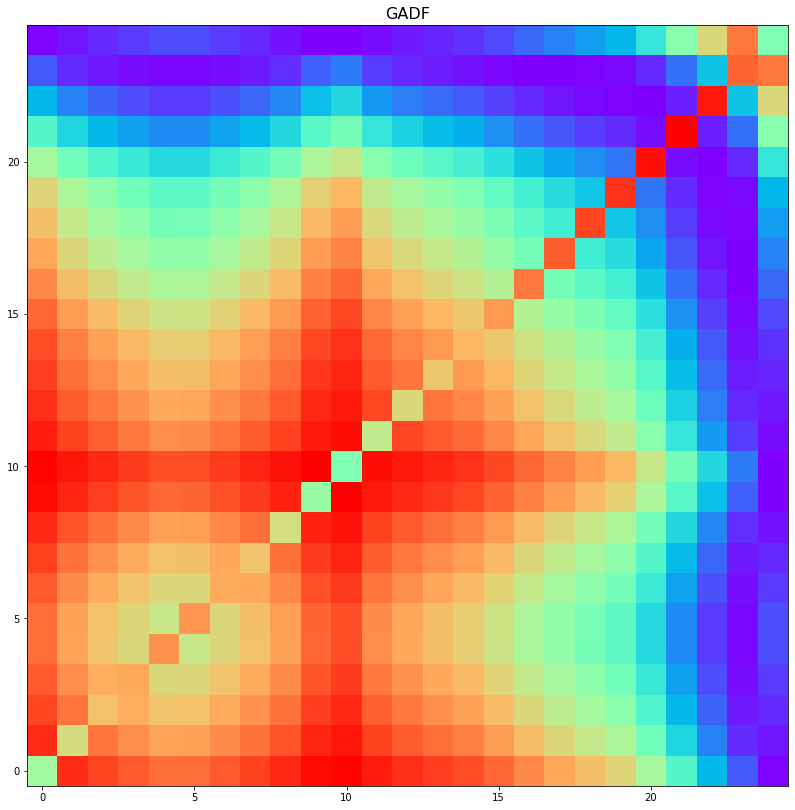

In [43]:
plt.figure(figsize=(30, 30))
plt.subplot(121)
plt.imshow(NP[0,:,:,0], cmap='rainbow', origin='lower')
plt.title("GADF", fontsize=16)


In [25]:
label

array(['STD', 'STD', 'STD', ..., 'LYI', 'LYI', 'LYI'], dtype='<U3')

In [26]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


KeyboardInterrupt: ignored

In [ ]:
import random
idx=np.arange(NP.shape[0])
np.random.shuffle(idx)


In [ ]:
NP=NP[idx,:,:,:]
label=label[idx]

In [ ]:
ori,cat=np.unique(label,return_inverse=True)
print(cat)


In [ ]:
print(ori)

In [ ]:
print(NP.shape)

In [ ]:
train=NP[:50000,:,:,:]
test=NP[50000:,:,:,:]
train_label=cat[:50000]
test_label=cat[50000:]

In [ ]:

inputshape=(train.shape[1],train.shape[2],train.shape[3])
print(inputshape)

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
adm=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        keras.Input(shape=inputshape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(6, activation="softmax"),
    ]
)
model.compile(
  optimizer=adm,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  train,
  to_categorical(train_label),validation_split=0.2,
  epochs=30
)

In [ ]:
print(test.shape)

In [ ]:
t=model.predict(test)
res=[]
for i in range(t.shape[0]):
  idx=np.argmax(np.array(t[i,:]))
  res.append(idx)
print(res)

In [ ]:
np.savetxt("y_pred_1_3feat_img.txt",res)
np.savetxt("y_val_1_3feat_img.txt",test_label)

In [ ]:
print(test_label)
print(res)

In [ ]:
x=(NP[0,:,:,0])
x[0][0]